## Using exemplary code to get a feel for markdown and Jupyter Notebooks



Demonstration script for pvmismatch >= 4.1:
Various examples of PV system modeling using the PVMismatch library.

In [2]:
# imports
from pvmismatch import *  # imports core PVMismatch components
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd

### Ex.1 - Simple system creation and IV curve plotting


Basic Electrical Parameters of System
pvsys.Vmp=1140.2995470504923
pvsys.Imp=177.4549249616383
pvsys.Pmp=202351.77055563527
pvsys.FF=np.float64(0.7870699485325445)
pvsys.eff=np.float64(0.2182067046269004)
pvsys.Voc=np.float64(1359.0830821510062)
pvsys.Isc=np.float64(189.16799973683257)
pvsys.numberMods=[21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21]
pvsys.numberStrs=30


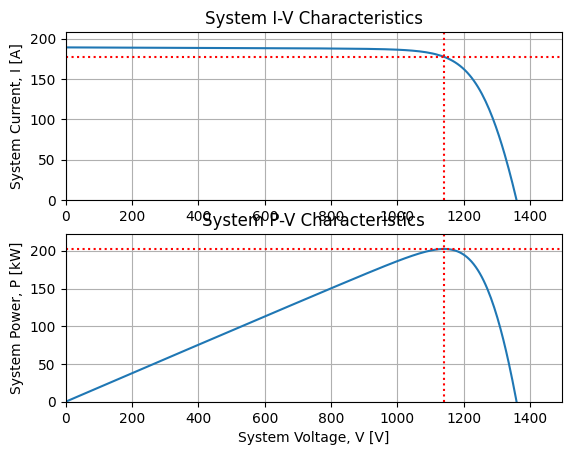

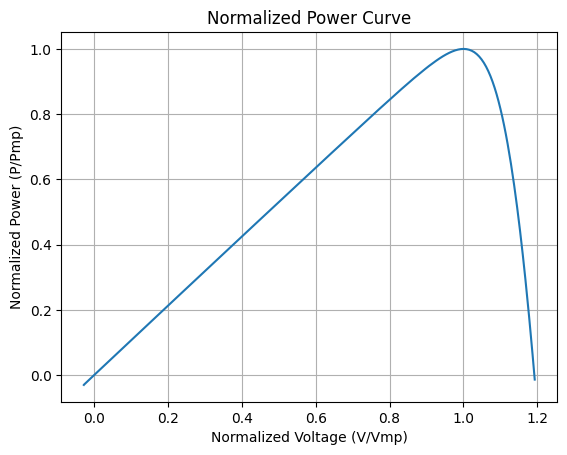

In [3]:
pvsys = pvsystem.PVsystem(numberStrs=30, numberMods=21)
# plt.ion()  # commented out as interactive plotting is not supported in PyCharm Community Edition
f = pvsys.plotSys()

# Print basic electrical parameters
print('\nBasic Electrical Parameters of System')
print(f'{pvsys.Vmp=}')  # Max voltage [V]
print(f'{pvsys.Imp=}')  # Max current [A]
print(f'{pvsys.Pmp=}')  # Max power [W]
print(f'{pvsys.FF=}')   # Fill factor
print(f'{pvsys.eff=}')  # Efficiency
print(f'{pvsys.Voc=}')
print(f'{pvsys.Isc=}')
print(f'{pvsys.numberMods=}')
print(f'{pvsys.numberStrs=}')

# Normalized IV curve plot
fig, ax = plt.subplots(1, 1)
ax.plot(pvsys.Vsys / pvsys.Vmp, pvsys.Psys / pvsys.Pmp)
ax.set_xlabel('Normalized Voltage (V/Vmp)')
ax.set_ylabel('Normalized Power (P/Pmp)')
ax.set_title('Normalized Power Curve')
ax.grid()

### Ex.2 - Single module shading analysis

In [4]:
# Set irradiance of sun to 1.0 = 1000 W/m^2 (STC)
pvsys.setSuns(1.0)
power_per_module_before = pvsys.Pmp / sum(pvsys.numberMods)

# Shade module 0 in string 0 heavily 0.01% irradiance
pvsys.setSuns({0: {0: 0.0001}})
power_per_module_after = pvsys.Pmp / sum(pvsys.numberMods)

print('\nSingle Module Shading Analysis')
print(f'{power_per_module_before=}')
print(f'{power_per_module_after=}')
module_eq_diff = (power_per_module_before - power_per_module_after) * sum(pvsys.numberMods) / power_per_module_before
print(f'{module_eq_diff=}')


Single Module Shading Analysis
power_per_module_before=321.1932865962465
power_per_module_after=320.2611883466447
module_eq_diff=1.8282508438206666


### Ex.3 - Partial shading and heating example


Partial Shading and Heating Example
pvsys.Pmp=4244.73890968436


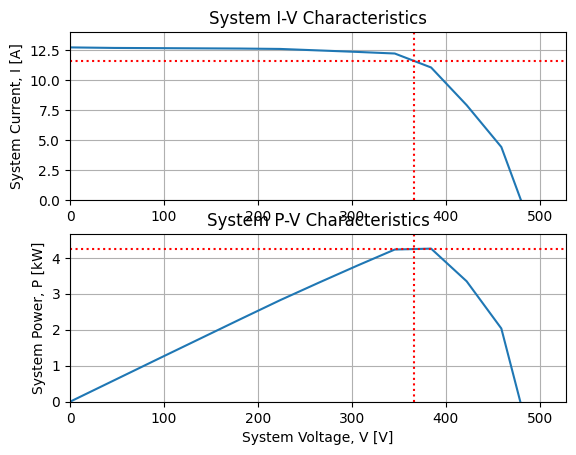

In [5]:
# 2x8 module array
pvsys = pvsystem.PVsystem(numberStrs=2, numberMods=8)
# Shades 8 individual cells within a module to 20% irradiance
pvsys.setSuns({0: {0: [(0.2,) * 8, (11, 12, 35, 36, 59, 60, 83, 84)]}})
# Set temp to Kelvin and heat the same cells to 100C
pvsys.setTemps(50. + 273.15)
pvsys.setTemps({0: {0: [(100. + 273.15,) * 8, (11, 12, 35, 36, 59, 60, 83, 84)]}})
# Show thermal mismatch + irradiance mismatch at cell level
f_shade = pvsys.plotSys()
print('\nPartial Shading and Heating Example')
print(f'{pvsys.Pmp=}')


### Ex.4 - Shading effect by type


Shading Effect By Type (Diode or Bottom Row)
pvsys.Pmp=926477.4917240639
Lost module eq: module_equivalent_loss=16.922660111619077
Mismatch: 0.007301197120183067
module_equivalent_loss/num_degraded_modules=0.8058409576961465


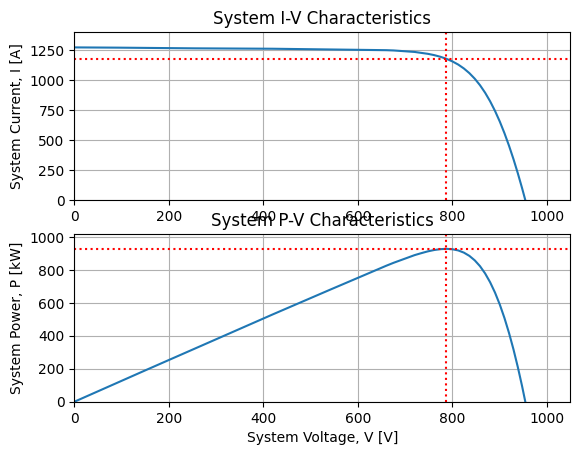

In [6]:
numberStrs = 200
numberMods = 21
num_degraded_modules = 21
# if shading_type = 'diode', all cells in 1 bypass-diode group shaded heavily
# if shading_type = 'bottom_row', cells near the bottom of a module shaded with diffuse light (20%)
shading_type = 'bottom_row'
diffuse_fraction = 0.2
pvsys = pvsystem.PVsystem(numberStrs=numberStrs, numberMods=numberMods, pvmods=pvmodule.PVmodule(cell_pos=pvmodule.STD72))
pvsys.setTemps(50. + 273.15)
before_shade = pvsys.Pmp

# Apply shading
for n in range(num_degraded_modules):
    if shading_type == 'diode':
        pvsys.setSuns({0: {n: [(0.001,) * 24, tuple(range(24))]}})
    elif shading_type == 'bottom_row':
        pvsys.setSuns({0: {n: [(diffuse_fraction,) * 6, (11, 12, 35, 36, 59, 60)]}})

after_shade = pvsys.Pmp
f_shade = pvsys.plotSys()

module_power_remaining = 0.667 if shading_type == 'diode' else diffuse_fraction
module_equivalent_loss = (before_shade - after_shade) / (before_shade / (numberStrs * numberMods))

print('\nShading Effect By Type (Diode or Bottom Row)')
print(f'{pvsys.Pmp=}')
print(f'Lost module eq: {module_equivalent_loss=}')
Pnom_reduction = (1 - module_power_remaining)
print(f'Mismatch: {(module_equivalent_loss/num_degraded_modules)/Pnom_reduction - 1}')
print(f'{module_equivalent_loss/num_degraded_modules=}')


### Ex.5 - Module and cell visualization

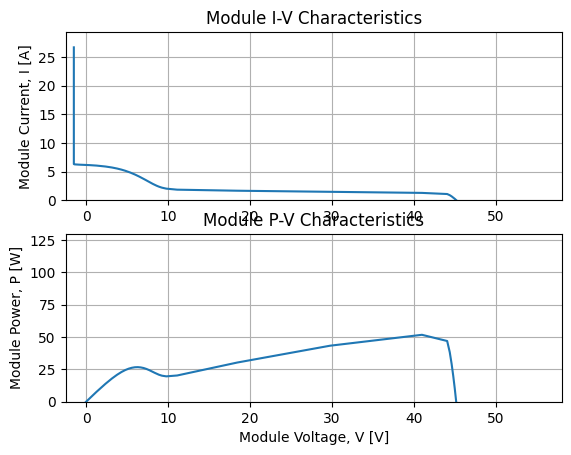

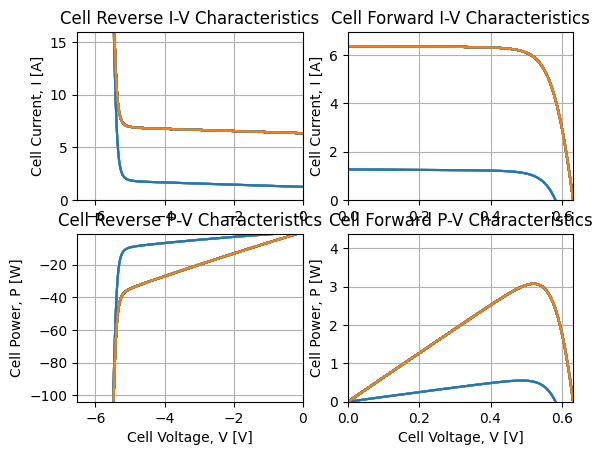

In [7]:
f_mod00 = pvsys.pvmods[0][0].plotMod()
f_modd00_cells = pvsys.pvmods[0][0].plotCell()

### Ex.6 - Loop over number of strings to examine shading effect

[Text(0.5, 0, 'Number of Strings'), Text(0, 0.5, 'Module Eq. Loss')]

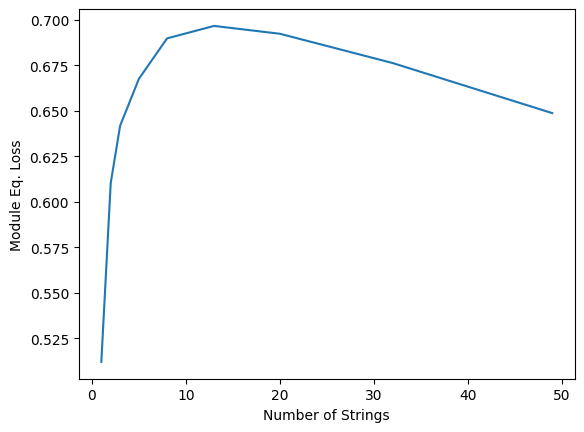

In [8]:
num_strings_list = np.unique(np.logspace(0, np.log10(50), num=10, dtype=int))
module_eq_diff_list = []
num_modules_per_string = 20

for num_strings in num_strings_list:
    pvsys = pvsystem.PVsystem(numberStrs=int(num_strings), numberMods=num_modules_per_string)
    pvsys.setTemps(50. + 273.15)

    power_per_module_before = pvsys.Pmp / sum(pvsys.numberMods)
    pvsys.setSuns({0: {0: 0.9}})
    power_per_module_after = pvsys.Pmp / sum(pvsys.numberMods)

    module_eq_diff = (power_per_module_before - power_per_module_after) * sum(pvsys.numberMods) / power_per_module_before
    module_eq_diff_list.append(module_eq_diff)

fig, ax = plt.subplots()
ax.plot(num_strings_list, module_eq_diff_list)
ax.set(xlabel='Number of Strings', ylabel='Module Eq. Loss')


### Ex.7 - Simulating shortened strings (shaded modules)

In [9]:
from time import time
start = time()

n_modules_missing = 1
n_strings_missing = 1
underperformance_fraction = 0.01

pvsys = pvsystem.PVsystem(numberStrs=30, numberMods=21)
pvsys.setTemps(50. + 273.15)
power_per_module_before = pvsys.Pmp / sum(pvsys.numberMods)

for n in range(n_strings_missing):
    for m in range(n_modules_missing):
        pvsys.setSuns({n: {m: underperformance_fraction}})

power_per_module_after = pvsys.Pmp / sum(pvsys.numberMods)
module_eq_diff = (power_per_module_before - power_per_module_after) * sum(pvsys.numberMods) / power_per_module_before

missing_module_effect = n_modules_missing * n_strings_missing * (1 - underperformance_fraction)
print(f'{missing_module_effect=}')
print(f'{module_eq_diff=}')
print(f'Multiplier = {module_eq_diff/missing_module_effect}')
print(f'{time() - start=}')

missing_module_effect=0.99
module_eq_diff=1.699114640008922
Multiplier = 1.7162774141504265
time() - start=7.592326879501343


In [10]:
### Ex.8 - Create custom cell with series/shunt resistance

Fill factor = 49.52993903484246


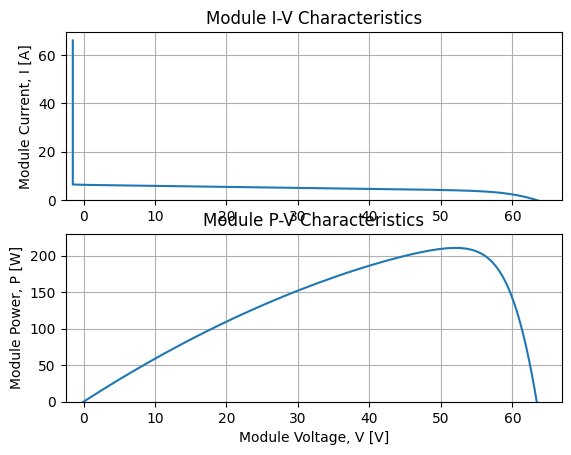

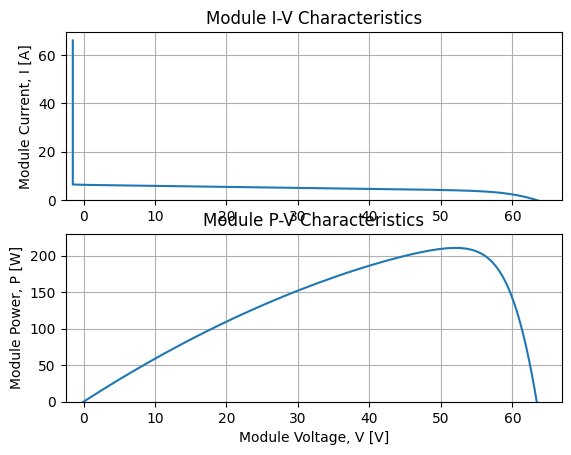

In [11]:
mycell = pvcell.PVcell(Rsh=0.25)
pvm = pvmodule.PVmodule(cell_pos=pvmodule.STD96, pvcells=[mycell] * 96)
print(f'Fill factor = {max(pvm.Pmod)/(np.median(pvm.Isc)*np.median(pvm.Voc))}')
pvm.plotMod()

### Ex.9 - Compare standard and degraded modules in strings

module_power_remaining=np.float64(0.6560675910158849)
Pnom_reduction=np.float64(0.34393240898411515)
module_eq_diff=0.8393300027511803
Mismatch = 1.4403923004241963


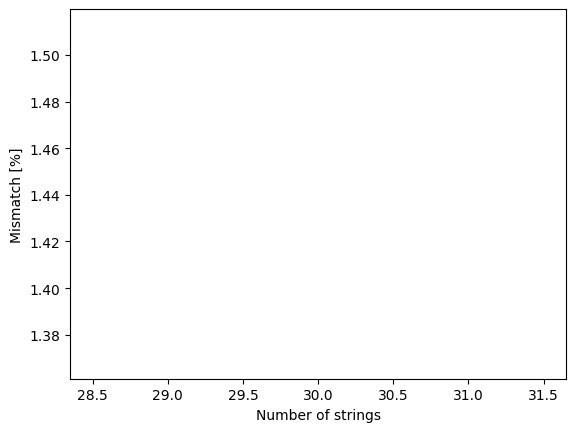

In [12]:
num_strings_list = [30]
results = []
num_modules_per_string = 21
num_degraded_modules = 1
num_degraded_strings = 1
missing_module = False

cell_std = pvcell.PVcell()
cell_degraded = pvcell.PVcell(Rsh=0.25)

module_std = pvmodule.PVmodule(cell_pos=pvmodule.STD72, pvcells=[cell_std]*72)
module_degraded = pvmodule.PVmodule(cell_pos=pvmodule.STD72, pvcells=[cell_degraded]*72)

module_power_remaining = 0 if missing_module else max(module_degraded.Pmod)/max(module_std.Pmod)
print(f'{module_power_remaining=}')

for num_strings in num_strings_list:
    string_std = pvstring.PVstring(pvmods=[module_std]*num_modules_per_string)
    modules_list = [module_degraded]*num_degraded_modules + [module_std]*(num_modules_per_string - num_degraded_modules)

    if missing_module:
        string_degraded = pvstring.PVstring(pvmods=[module_std]*(num_modules_per_string - num_degraded_modules))
    else:
        string_degraded = pvstring.PVstring(pvmods=modules_list)

    pvsys_std = pvsystem.PVsystem(pvstrs=[string_std]*num_strings)
    pvsys_degraded = pvsystem.PVsystem(pvstrs=[string_degraded]*num_degraded_strings + [string_std]*(num_strings - num_degraded_strings))

    pvsys_std.setTemps(50. + 273.15)
    pvsys_degraded.setTemps(50. + 273.15)

    power_per_module_std = pvsys_std.Pmp / sum(pvsys_std.numberMods)
    power_per_module_degraded = pvsys_degraded.Pmp / sum(pvsys_std.numberMods)

    module_eq_diff = (power_per_module_std - power_per_module_degraded) * sum(pvsys_std.numberMods) / power_per_module_std
    Pnom_reduction = num_degraded_modules * num_degraded_strings * (1 - module_power_remaining)

    print(f'{Pnom_reduction=}')
    print(f'{module_eq_diff=}')
    print(f'Mismatch = {module_eq_diff/Pnom_reduction - 1}')
    results.append(module_eq_diff/Pnom_reduction - 1)

fig, ax = plt.subplots()
ax.plot(num_strings_list, results)
ax.set(xlabel='Number of strings', ylabel='Mismatch [%]')

# String power estimation at Vmp for degraded string (index 0)
string_index = 0
string_power = np.interp(pvsys_degraded.Vmp, pvsys_degraded.pvstrs[string_index].Vstring, pvsys_degraded.pvstrs[string_index].Pstring)

### Ex.10 - Simulate removal of modules by reconstructing the system

In [13]:
num_modules_per_string = 21
num_strings = 30
num_missing_modules = 1
num_strings_with_missing_modules = 1
nom_modules_total = num_modules_per_string * num_strings

cell_std = pvcell.PVcell()
module_std = pvmodule.PVmodule(cell_pos=pvmodule.STD72, pvcells=[cell_std]*72)

# Full system with all modules
full_string = pvstring.PVstring(pvmods=[module_std] * num_modules_per_string)
pvsys_full = pvsystem.PVsystem(pvstrs=[full_string] * num_strings)
pvsys_full.setTemps(50. + 273.15)

power_per_module_std = pvsys_full.Pmp / nom_modules_total

# Build degraded system with some strings missing modules
pvstrs_degraded = []

for i in range(num_strings):
    if i < num_strings_with_missing_modules:
        # Create strings with missing modules
        pvstrs_degraded.append(pvstring.PVstring(
            pvmods=[module_std] * (num_modules_per_string - num_missing_modules)
        ))
    else:
        # Normal strings
        pvstrs_degraded.append(pvstring.PVstring(
            pvmods=[module_std] * num_modules_per_string
        ))

pvsys_degraded = pvsystem.PVsystem(pvstrs=pvstrs_degraded)
pvsys_degraded.setTemps(50. + 273.15)

# Use full array module count for consistent comparison
power_per_module_degraded = pvsys_degraded.Pmp / nom_modules_total

print(f'{power_per_module_std=}')
print(f'{power_per_module_degraded=}')

module_eq_diff = (power_per_module_std - power_per_module_degraded) * nom_modules_total / power_per_module_std

Pnom_reduction = num_missing_modules * num_strings_with_missing_modules
print(f'{Pnom_reduction=}')
print(f'{module_eq_diff=}')
print(f'Mismatch = {module_eq_diff / Pnom_reduction - 1:.4f}')


/Users/tidelangner/Desktop/5th Year/MEC4128S/FYP_code/.venv/lib/python3.10/site-packages/pvmismatch/pvmismatch_lib/pvconstants.py:53: RuntimeWarning: divide by zero encountered in divide
  yleft = fp[0] + (xleft - xp[0]) / (xp[1] - xp[0]) * (fp[1] - fp[0])


power_per_module_std=221.48227643067838
power_per_module_degraded=220.9273517278689
Pnom_reduction=1
module_eq_diff=1.5784674440051172
Mismatch = 0.5785
